In [68]:
import itertools
from pathlib import Path
import warnings
import pickle
import tqdm

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

warnings.simplefilter("error")


In [2]:
def select_cols(num_cols: int) -> list[pl.Expr]:
    return list(map(lambda i: pl.col(f"column_{i}"), range(num_cols)))


In [3]:
data_path = Path("/home/shinsei/MyResearches/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_train_data_clustering.csv")
df = pl.read_csv(data_path)
n_lf = 128
X = df.select(select_cols(n_lf))
sample_nums = df.select(["dirname"]).to_numpy().flatten()
local_structure_clusters = df.select(["cluster"]).to_numpy().flatten()


In [4]:
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)


In [1]:
tsne_hparams = {
    "perplexity": [5, 8, 16, 32, 50],
    "learning_rate": [1e1, 1e2, 1e3],
    "metric": ["euclidean", "minkowski", "cityblock", "seuclidean", "cosine", "jaccard"]
}


各パラメータごとにフィッティングする

In [6]:
tsnes: list[TSNE] = []
tsne_used_hparams: list[tuple[str, int, float, str]] = []
tsne_hparams_comb = itertools.product(*tsne_hparams.values())

for i, (perplexity, learning_rate, metric) in enumerate(tsne_hparams_comb):
    tsnes.append(
        TSNE(
            # hyper parameters
            perplexity=perplexity,
            learning_rate=learning_rate,
            metric=metric,
            # execution configuration
            random_state=42,
            n_jobs=1,
        )
    )
    print("==============================================================================")
    print(f"Configs: {i: 03}\n {perplexity=}\n {learning_rate=}\n {metric=}")

    try:
        tsnes[i].fit(X)
        tsne_used_hparams.append((True, perplexity, learning_rate, metric))
    except:
        print("Due to a warning or error, proceed to the next step")
        tsne_used_hparams.append((False, perplexity, learning_rate, metric))
        continue


Configs:  00
 perplexity=5
 learning_rate=10.0
 metric='euclidean'
Configs:  01
 perplexity=5
 learning_rate=10.0
 metric='minkowski'
Configs:  02
 perplexity=5
 learning_rate=10.0
 metric='cityblock'
Configs:  03
 perplexity=5
 learning_rate=10.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  04
 perplexity=5
 learning_rate=10.0
 metric='cosine'
Configs:  05
 perplexity=5
 learning_rate=10.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  06
 perplexity=5
 learning_rate=100.0
 metric='euclidean'
Configs:  07
 perplexity=5
 learning_rate=100.0
 metric='minkowski'
Configs:  08
 perplexity=5
 learning_rate=100.0
 metric='cityblock'
Configs:  09
 perplexity=5
 learning_rate=100.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  10
 perplexity=5
 learning_rate=100.0
 metric='cosine'
Configs:  11
 perplexity=5
 learning_rate=100.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  12
 perplexity=5
 learning_rate=1000.0
 metric='euclidean'
Configs:  13
 perplexity=5
 learning_rate=1000.0
 metric='minkowski'
Configs:  14
 perplexity=5
 learning_rate=1000.0
 metric='cityblock'
Configs:  15
 perplexity=5
 learning_rate=1000.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  16
 perplexity=5
 learning_rate=1000.0
 metric='cosine'
Configs:  17
 perplexity=5
 learning_rate=1000.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  18
 perplexity=8
 learning_rate=10.0
 metric='euclidean'
Configs:  19
 perplexity=8
 learning_rate=10.0
 metric='minkowski'
Configs:  20
 perplexity=8
 learning_rate=10.0
 metric='cityblock'
Configs:  21
 perplexity=8
 learning_rate=10.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  22
 perplexity=8
 learning_rate=10.0
 metric='cosine'
Configs:  23
 perplexity=8
 learning_rate=10.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  24
 perplexity=8
 learning_rate=100.0
 metric='euclidean'
Configs:  25
 perplexity=8
 learning_rate=100.0
 metric='minkowski'
Configs:  26
 perplexity=8
 learning_rate=100.0
 metric='cityblock'
Configs:  27
 perplexity=8
 learning_rate=100.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  28
 perplexity=8
 learning_rate=100.0
 metric='cosine'
Configs:  29
 perplexity=8
 learning_rate=100.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  30
 perplexity=8
 learning_rate=1000.0
 metric='euclidean'
Configs:  31
 perplexity=8
 learning_rate=1000.0
 metric='minkowski'
Configs:  32
 perplexity=8
 learning_rate=1000.0
 metric='cityblock'
Configs:  33
 perplexity=8
 learning_rate=1000.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  34
 perplexity=8
 learning_rate=1000.0
 metric='cosine'
Configs:  35
 perplexity=8
 learning_rate=1000.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  36
 perplexity=16
 learning_rate=10.0
 metric='euclidean'
Configs:  37
 perplexity=16
 learning_rate=10.0
 metric='minkowski'
Configs:  38
 perplexity=16
 learning_rate=10.0
 metric='cityblock'
Configs:  39
 perplexity=16
 learning_rate=10.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  40
 perplexity=16
 learning_rate=10.0
 metric='cosine'
Configs:  41
 perplexity=16
 learning_rate=10.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  42
 perplexity=16
 learning_rate=100.0
 metric='euclidean'
Configs:  43
 perplexity=16
 learning_rate=100.0
 metric='minkowski'
Configs:  44
 perplexity=16
 learning_rate=100.0
 metric='cityblock'
Configs:  45
 perplexity=16
 learning_rate=100.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  46
 perplexity=16
 learning_rate=100.0
 metric='cosine'
Configs:  47
 perplexity=16
 learning_rate=100.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  48
 perplexity=16
 learning_rate=1000.0
 metric='euclidean'
Configs:  49
 perplexity=16
 learning_rate=1000.0
 metric='minkowski'
Configs:  50
 perplexity=16
 learning_rate=1000.0
 metric='cityblock'
Configs:  51
 perplexity=16
 learning_rate=1000.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  52
 perplexity=16
 learning_rate=1000.0
 metric='cosine'
Configs:  53
 perplexity=16
 learning_rate=1000.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  54
 perplexity=32
 learning_rate=10.0
 metric='euclidean'
Configs:  55
 perplexity=32
 learning_rate=10.0
 metric='minkowski'
Configs:  56
 perplexity=32
 learning_rate=10.0
 metric='cityblock'
Configs:  57
 perplexity=32
 learning_rate=10.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  58
 perplexity=32
 learning_rate=10.0
 metric='cosine'
Configs:  59
 perplexity=32
 learning_rate=10.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  60
 perplexity=32
 learning_rate=100.0
 metric='euclidean'
Configs:  61
 perplexity=32
 learning_rate=100.0
 metric='minkowski'
Configs:  62
 perplexity=32
 learning_rate=100.0
 metric='cityblock'
Configs:  63
 perplexity=32
 learning_rate=100.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  64
 perplexity=32
 learning_rate=100.0
 metric='cosine'
Configs:  65
 perplexity=32
 learning_rate=100.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  66
 perplexity=32
 learning_rate=1000.0
 metric='euclidean'
Configs:  67
 perplexity=32
 learning_rate=1000.0
 metric='minkowski'
Configs:  68
 perplexity=32
 learning_rate=1000.0
 metric='cityblock'
Configs:  69
 perplexity=32
 learning_rate=1000.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  70
 perplexity=32
 learning_rate=1000.0
 metric='cosine'
Configs:  71
 perplexity=32
 learning_rate=1000.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  72
 perplexity=50
 learning_rate=10.0
 metric='euclidean'
Configs:  73
 perplexity=50
 learning_rate=10.0
 metric='minkowski'
Configs:  74
 perplexity=50
 learning_rate=10.0
 metric='cityblock'
Configs:  75
 perplexity=50
 learning_rate=10.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  76
 perplexity=50
 learning_rate=10.0
 metric='cosine'
Configs:  77
 perplexity=50
 learning_rate=10.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  78
 perplexity=50
 learning_rate=100.0
 metric='euclidean'
Configs:  79
 perplexity=50
 learning_rate=100.0
 metric='minkowski'
Configs:  80
 perplexity=50
 learning_rate=100.0
 metric='cityblock'
Configs:  81
 perplexity=50
 learning_rate=100.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  82
 perplexity=50
 learning_rate=100.0
 metric='cosine'
Configs:  83
 perplexity=50
 learning_rate=100.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

Configs:  84
 perplexity=50
 learning_rate=1000.0
 metric='euclidean'
Configs:  85
 perplexity=50
 learning_rate=1000.0
 metric='minkowski'
Configs:  86
 perplexity=50
 learning_rate=1000.0
 metric='cityblock'
Configs:  87
 perplexity=50
 learning_rate=1000.0
 metric='seuclidean'
Due to a warning or error, proceed to the next step
Configs:  88
 perplexity=50
 learning_rate=1000.0
 metric='cosine'
Configs:  89
 perplexity=50
 learning_rate=1000.0
 metric='jaccard'


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2182: D

# 訓練を終えたモデルの保存
保存先はtmpになっているので後ほど自分で移動させること

In [8]:
save_model_path = Path("../models/tSNE/tmp/models/")

# store models
if not save_model_path.exists():
    save_model_path.mkdir(parents=True)
for i, tsne in enumerate(tsnes):
    with open(save_model_path / f"tsne_no{i:02}.pickle", "wb") as f:
        pickle.dump(tsne, f)

# store used hyper parameters
save_hparams_path = save_model_path.parent / "learned_tsne_configs.txt"
with open(save_hparams_path, "w") as f:
    f.write("No.,complete,perplexity,learning_rate,metric\n")
    for i, hparams in enumerate(tsne_used_hparams):
        f.write(f"{i},{hparams[0]},{hparams[1]},{hparams[2]},{hparams[3]}\n")


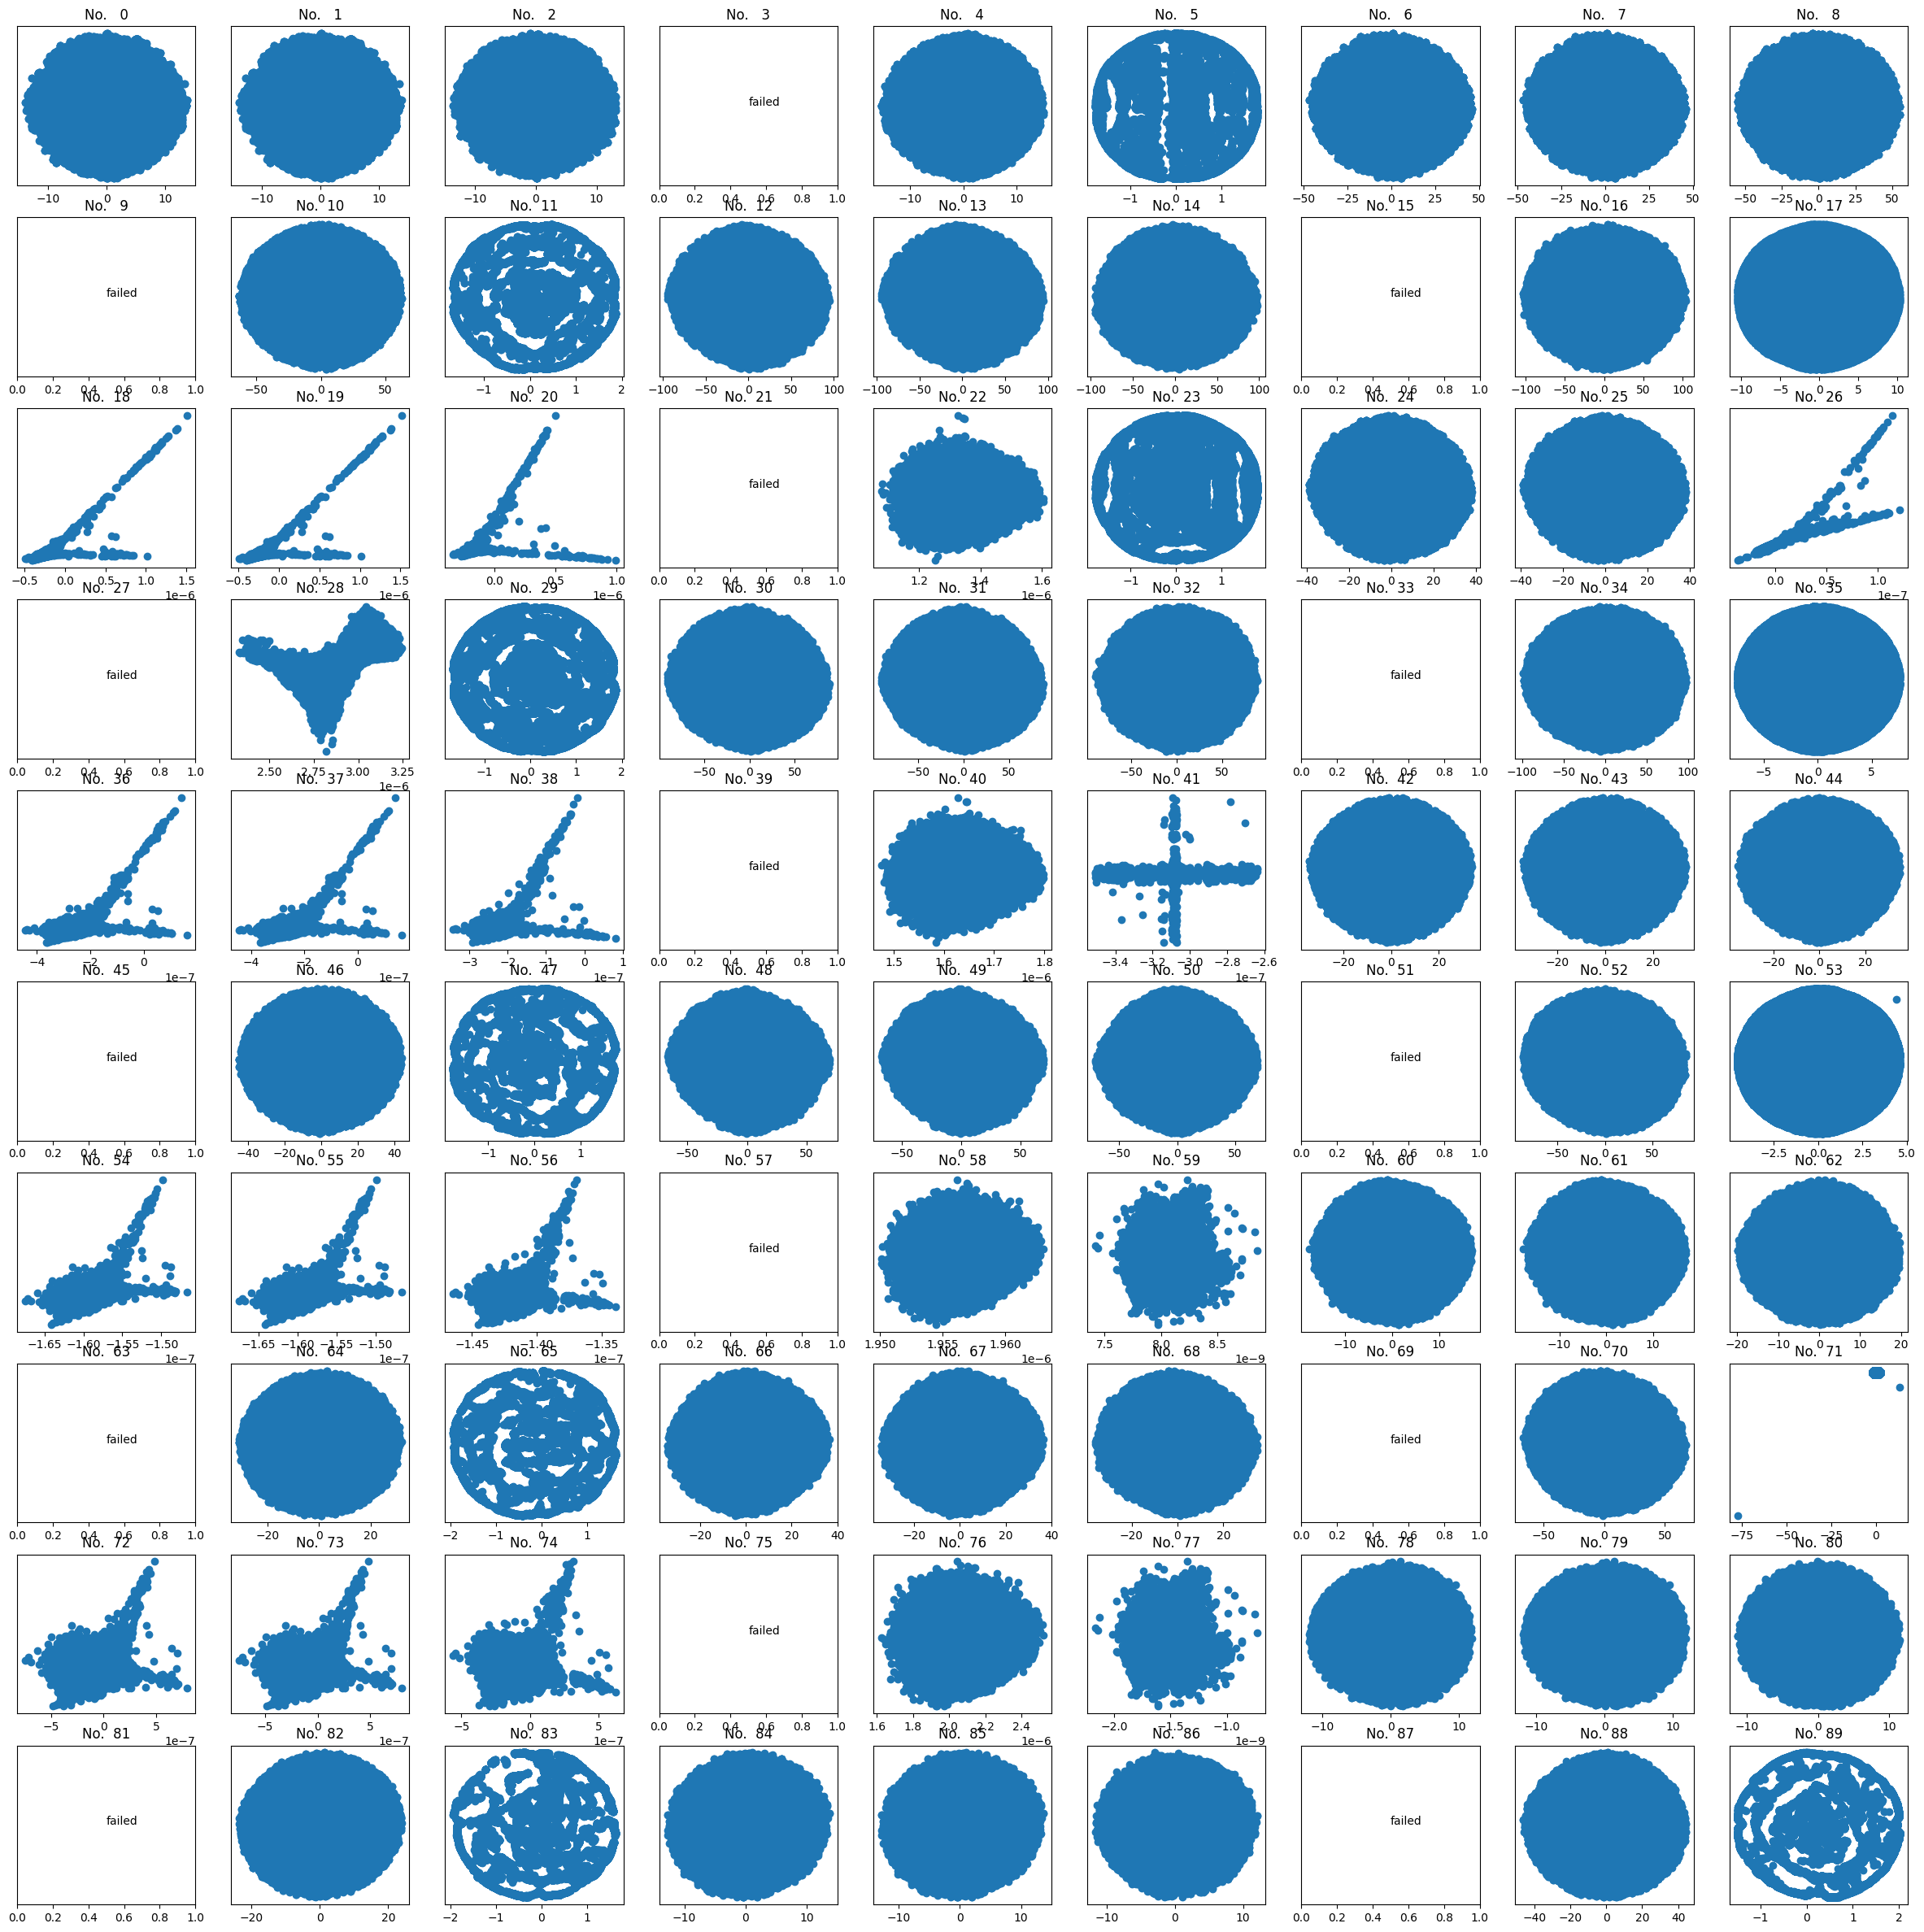

In [27]:
fig = plt.figure(figsize=(30, 30))
for i, (_tsne, _hparams) in enumerate(zip(tsnes, tsne_used_hparams)):
    complete_is = _hparams[0]
    ax = fig.add_subplot(10, 9, i+1)
    ax.set_title(f"No. {i:3}")
    ax.set_xticks([])
    ax.set_yticks([])

    if complete_is:
        # t-SNEは与えられたパラメータに対して砂を用意し砂を動かすイメージ．
        # なのでデータを与えてそれ用にフィッティング・変換しているわけではないので，各モデル固有のembedding_属性を使う．
        X_emb = _tsne.embedding_
        ax.scatter(X_emb[:, 0], X_emb[:, 1])
    else:
        ax.text(0.5, 0.5, s="failed")
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)


# 保存したモデルの読み出し

In [39]:
load_model_path = Path("../models/tSNE/2023-11-29/models/")
tsnes: list[TSNE] = []

for ppath in sorted(load_model_path.glob("*.pickle")):
    print(ppath.stem)
    with open(ppath, "rb") as f:
        tsnes.append(pickle.load(f))

# save used hyper parameters
load_hparam_path = load_model_path.parent / "learned_tsne_configs.txt"
tsne_hparams = pl.read_csv(load_hparam_path)


tsne_no00
tsne_no01
tsne_no02
tsne_no03
tsne_no04
tsne_no05
tsne_no06
tsne_no07
tsne_no08
tsne_no09
tsne_no10
tsne_no11
tsne_no12
tsne_no13
tsne_no14
tsne_no15
tsne_no16
tsne_no17
tsne_no18
tsne_no19
tsne_no20
tsne_no21
tsne_no22
tsne_no23
tsne_no24
tsne_no25
tsne_no26
tsne_no27
tsne_no28
tsne_no29
tsne_no30
tsne_no31
tsne_no32
tsne_no33
tsne_no34
tsne_no35
tsne_no36
tsne_no37
tsne_no38
tsne_no39
tsne_no40
tsne_no41
tsne_no42
tsne_no43
tsne_no44
tsne_no45
tsne_no46
tsne_no47
tsne_no48
tsne_no49
tsne_no50
tsne_no51
tsne_no52
tsne_no53
tsne_no54
tsne_no55
tsne_no56
tsne_no57
tsne_no58
tsne_no59
tsne_no60
tsne_no61
tsne_no62
tsne_no63
tsne_no64
tsne_no65
tsne_no66
tsne_no67
tsne_no68
tsne_no69
tsne_no70
tsne_no71
tsne_no72
tsne_no73
tsne_no74
tsne_no75
tsne_no76
tsne_no77
tsne_no78
tsne_no79
tsne_no80
tsne_no81
tsne_no82
tsne_no83
tsne_no84
tsne_no85
tsne_no86
tsne_no87
tsne_no88
tsne_no89


# それぞれのメトリクスごとに分けて描写

  0%|          | 0/6 [00:00<?, ?it/s]

euclidean


 17%|█▋        | 1/6 [00:02<00:10,  2.09s/it]

minkowski


 33%|███▎      | 2/6 [00:03<00:07,  1.90s/it]

cityblock


 50%|█████     | 3/6 [00:06<00:06,  2.05s/it]

seuclidean


 67%|██████▋   | 4/6 [00:06<00:02,  1.39s/it]

cosine


 83%|████████▎ | 5/6 [00:08<00:01,  1.52s/it]

jaccard


100%|██████████| 6/6 [00:09<00:00,  1.67s/it]


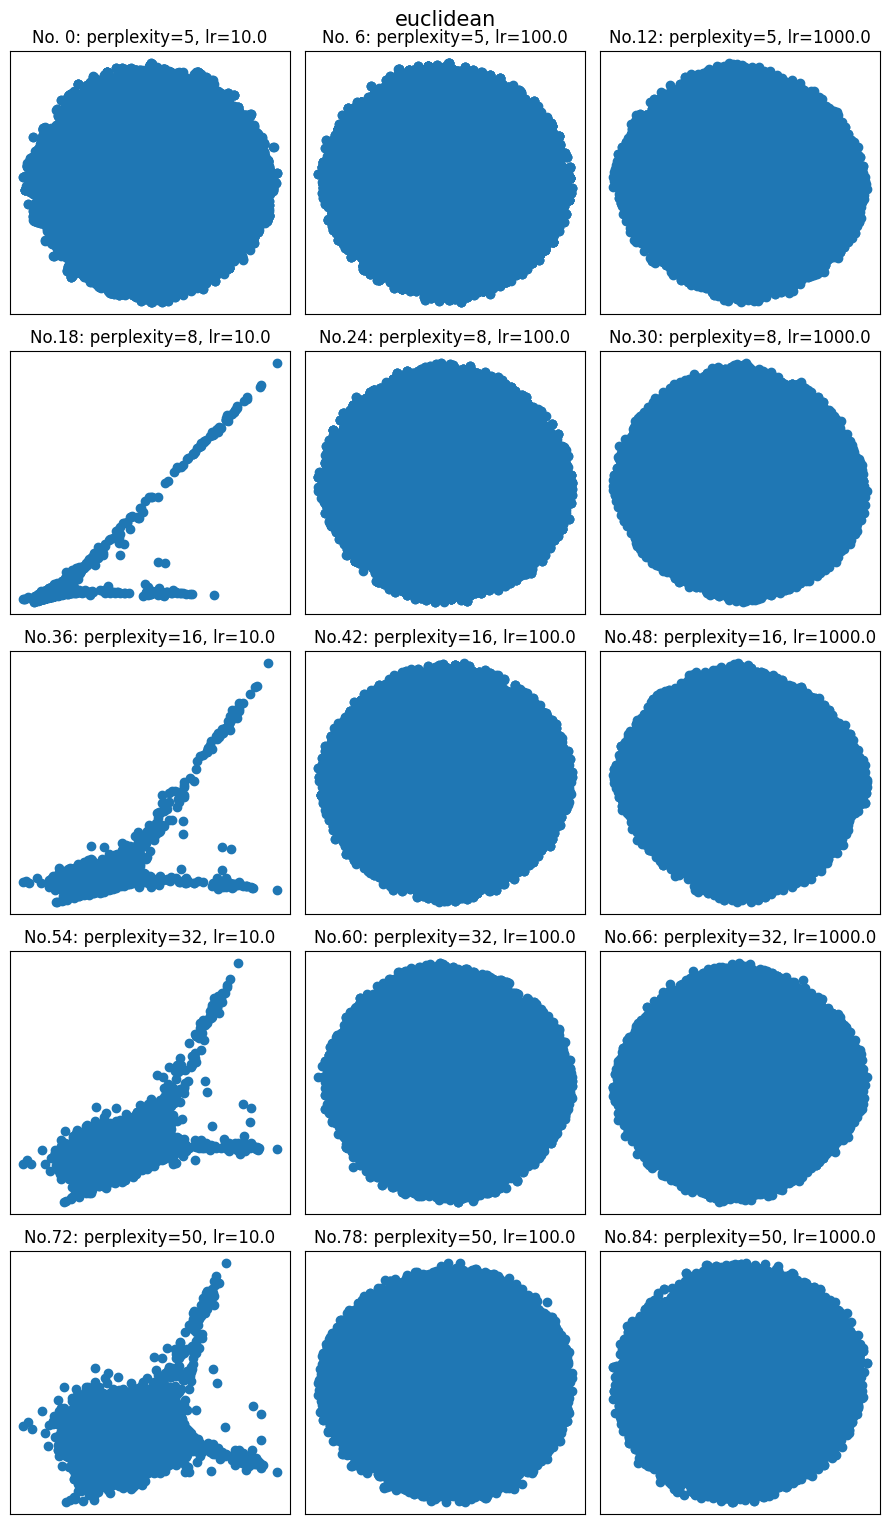

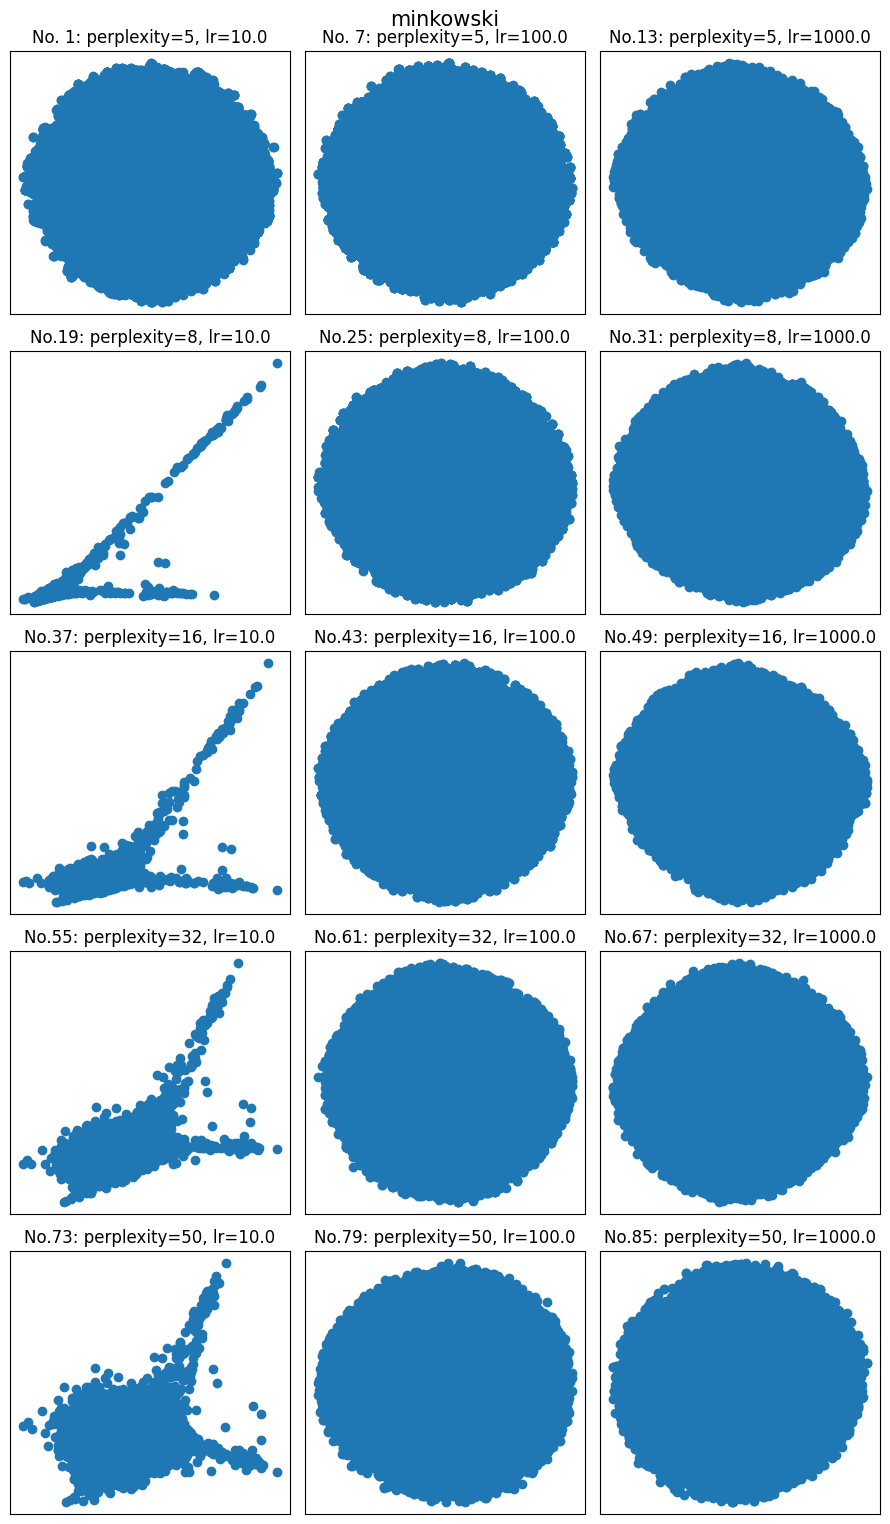

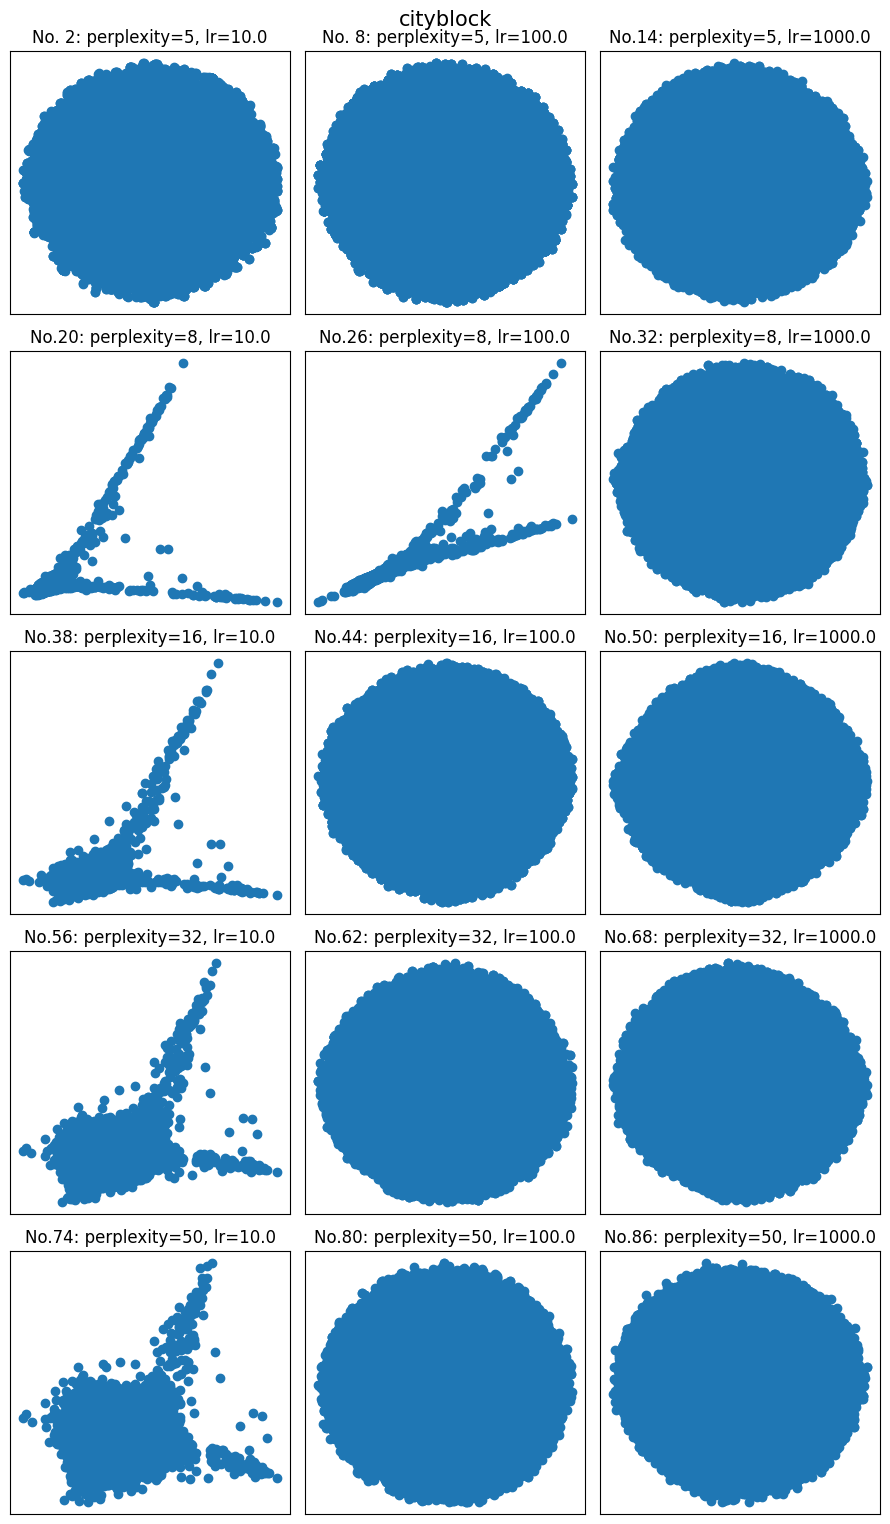

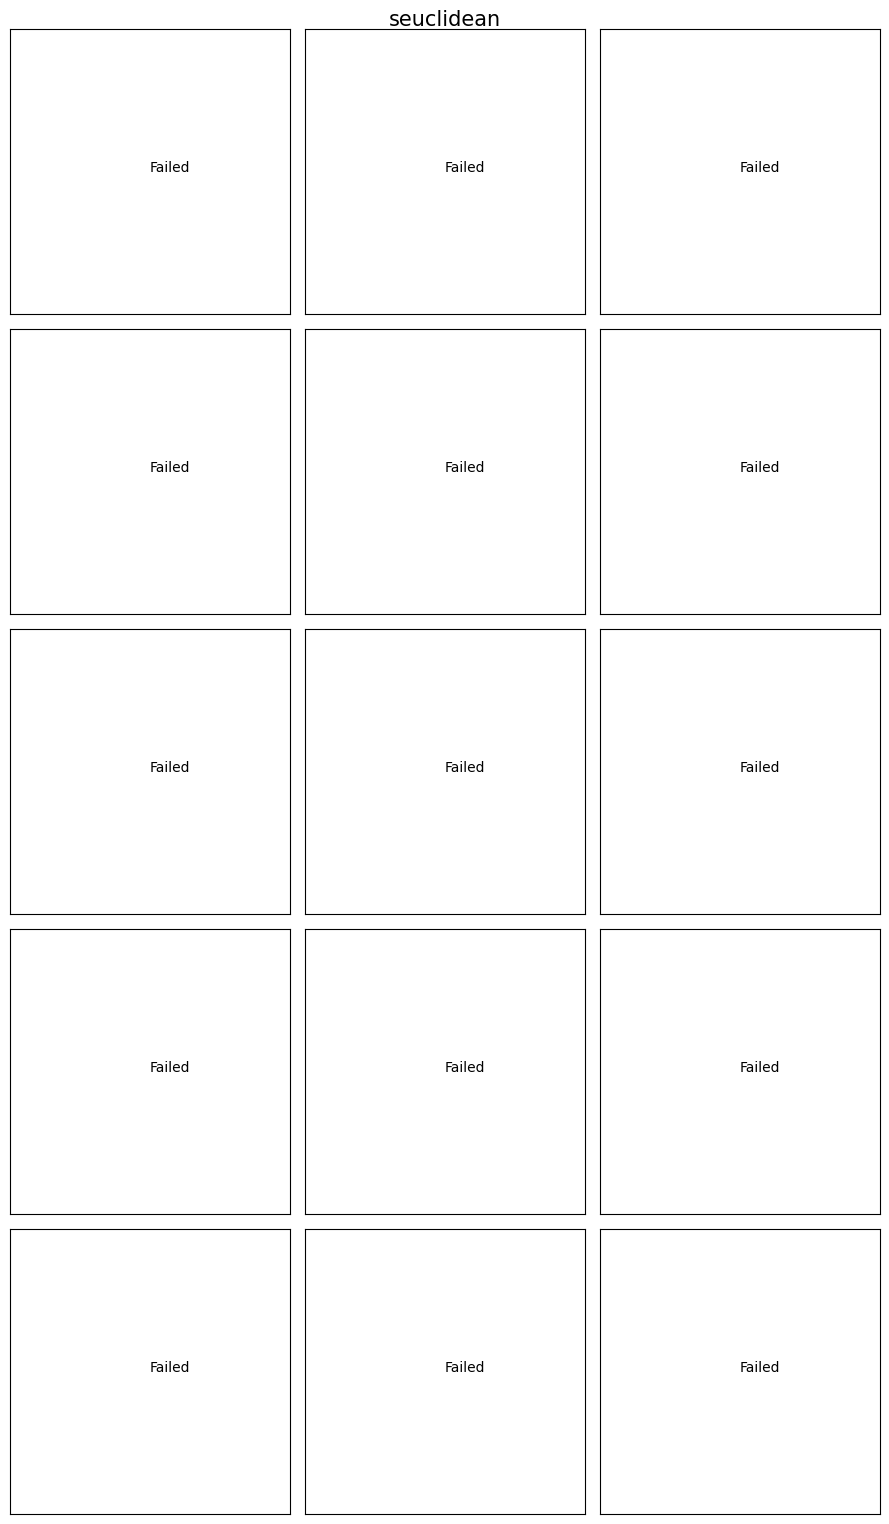

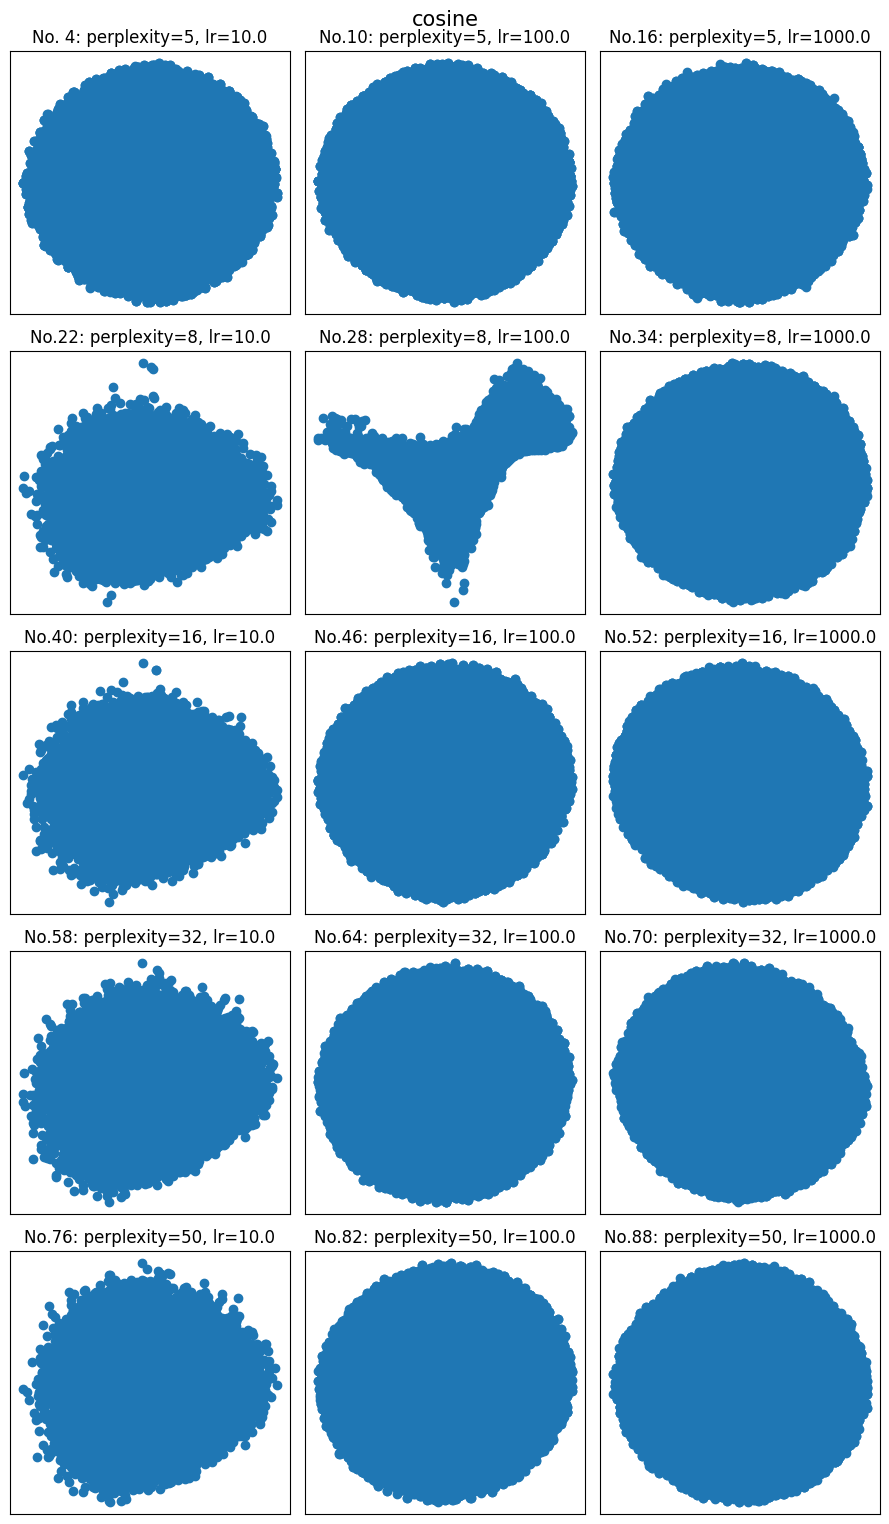

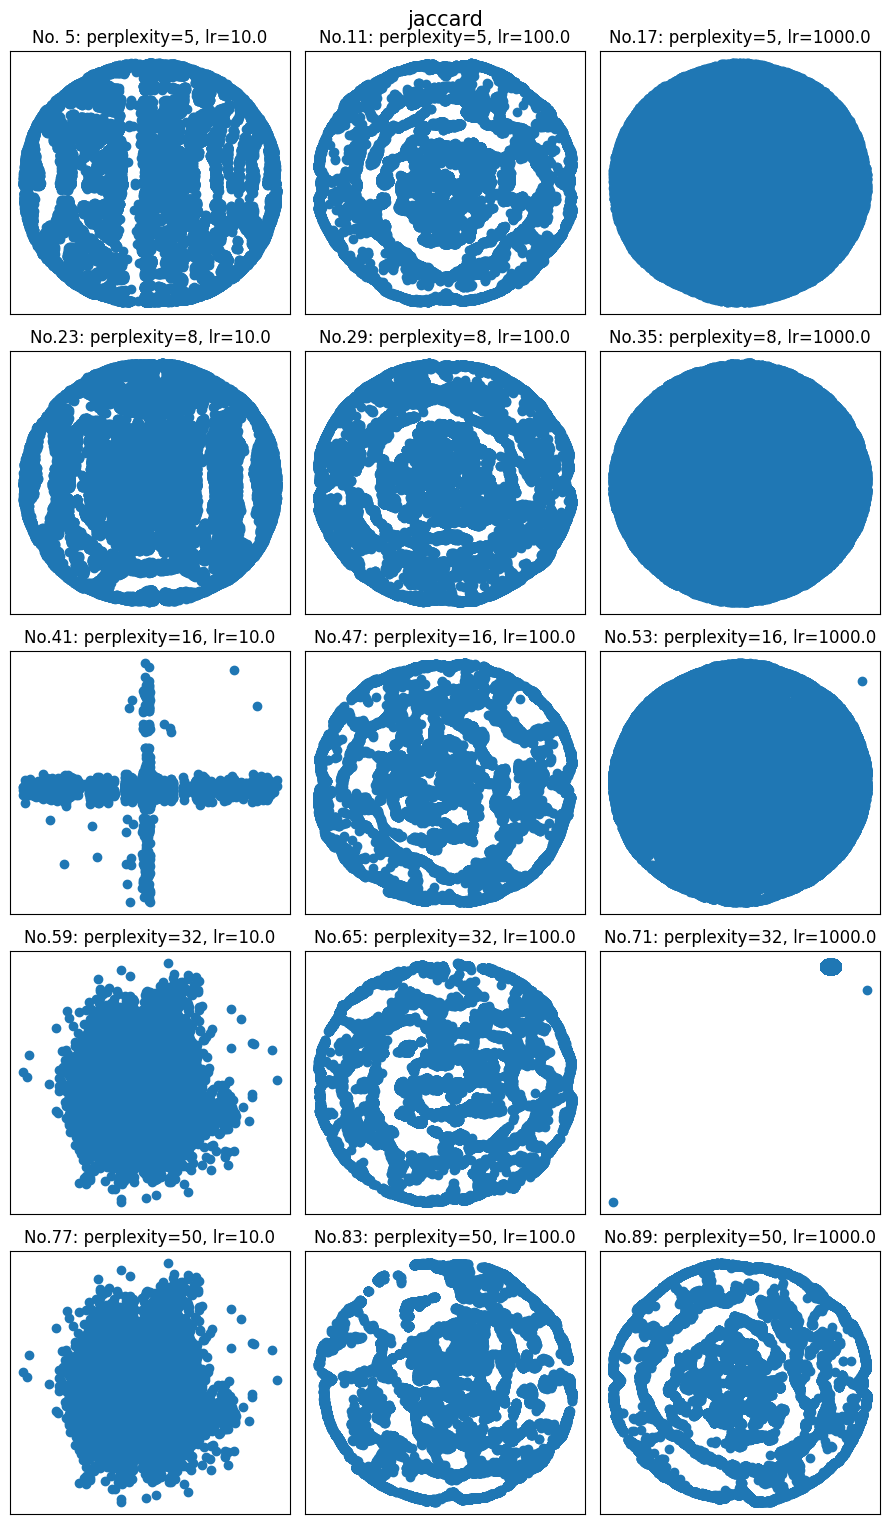

In [72]:
# TODO: 各metricごとに可視化する。
# metric ごとのインデックスを列とする
# イメージ：
# idx of euclidian: 1, 4, 6,
# idx of manhattan: 2, 3,
# idx of cosine   : 5, 7, 8,
used_metrics = tsne_hparams.select("metric").unique(maintain_order=True).to_numpy().flatten()

for metric in tqdm.tqdm(used_metrics):
    idx_of_used_metric = tsne_hparams.filter(
        pl.col("metric") == metric
    )

    fig = plt.figure(figsize=(9, 15.5))
    fig.suptitle(f"{metric}", fontsize=15)

    for i, (idx, is_complete, perplexity, lr, _) in enumerate( idx_of_used_metric.iter_rows() ):
        ax = fig.add_subplot(5, 3, i + 1)
        if is_complete:
            ax.set_title(f"No.{idx:2}: {perplexity=}, {lr=}")
            X_emb = tsnes[idx].embedding_
            ax.scatter(
                X_emb[:, 0],
                X_emb[:, 1],
            )
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.text(1, 1, "Failed")
            ax.set_xlim(0, 2)
            ax.set_ylim(0, 2)
            ax.set_xticks([])
            ax.set_yticks([])

    fig.tight_layout()
    fig.savefig(f"../reports/figures/SimpleCAE32/2023-07-10/12-37-46/DimReduce/tSNE/2023-11-29/tuned_by_{metric}.png", )
